# REDES NEURONALES PROFUNDAS
Utilice el conjunto de datos Fashion-MNIST para construir un clasificador convolucional de imágenes de productos. Para la construcción del modelo utilice los dos esquemas que se describen a continuación y compare los resultados:

1. Entrenar un Autocodificador convolucional multicapa.
2. Extraer la reducción de la dimensional que el Autocodificador construye en el entrenamiento.

compruebe con ejemplos el punto 2, es decir, que la reducción de la dimensionalidad es suficiente para reconstruir la imagen original.

## OBJETIVO
Aplicar el proceso de aprendizaje para resolver problemas reconstrucción de imágenes utilizando redes neuronales convolucionales profundas en Keras y TensorFlow.

## DATOS
Incluidos en Keras.
También, existe otra fuente equivalente que se consigue en el siguiente URL https://www.kaggle.com/zalando-research/fashionmnist donde hay un resumen de estos datos en el archivo CVS y XLSX.

la clasificación para el aprendizaje supervisado es:

    Label 	Class
    0 	 	T-shirt/top
    1 	 	Trouser
    2 	 	Pullover
    3 	 	Dress
    4 	 	Coat
    5 	 	Sandal
    6 	 	Shirt
    7 	 	Sneaker
    8 	 	Bag
    9 	 	Ankle boot

**Importante: Lea los comentarios y apuntes del Notebook para tener claridad de los pasos.**

### Consideraciones
- Utilice sólo los conjuntos de datos indicado.
- El frameworks a utilizar es TensorFlow, Keras con Jupyter Notebbooks.

### Enlaces de interés
- documentación Keras, URL: https://keras.io/models/sequential/
- documentación TensorFlow, URL: https://www.tensorflow.org/versions
- Tutorial CNN basico, URL: https://www.kaggle.com/nhlr21/deep-keras-cnn-tutorial/notebook


## Importando Librerias

In [1]:
# importando dependencias de trabajo
# importando librerias basicas
import os
import gc

# importando modulos de analisis de datos, ML y graficas
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

# importando dependencias para tensorflow
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# importando para sklearn
from sklearn.model_selection import train_test_split

# importando para keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import UpSampling2D

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## Funciones Utiles

In [3]:
# funcion que recibe una lista numpy y recupera la forma de cada elemento, devuelve una lista con formas
def get_shape(data):
    # respuesta de la funcion
    ans = list()

    for d in data:
        sp = d.shape
        ans.append(sp)
    return ans

In [4]:
# funcion que transforma el entero de la clase a la palabra de la etiqueta, devuelve una lista de etiquetas
def class2label(data, labels):
    # respuesta de la funcion
    ans = list()

    for d in data:
        d = int(d)
        l = str(labels[d])
        ans.append(l)
    return ans

In [5]:
# funcion que estandariza los datos en numpy de acuerdo a un valor min & max, devuelve un arreglo np flotante
def std_data(data, minv, maxv):
    rangev = maxv - minv
    ans = data.astype("float32")/float(rangev)
    # ans = pd.Series(ans)
    # respuesta de la funcion
    return ans

## Cargar y Preparar los Datos

Los pasos de esta sección son:

1. Leer los datos desde MNIST.
2. Formatear los datos para que los acepte el DataFrame de Pandas.
2. Crear el DataFrame de Pandas con un esquema propio.
2. Formatear los datos MNIST para pobrar el DataFrame de pandas.
3. Revisar que todo este como debería estar.

In [6]:
# lista de nombres de las clasificaciones
label_names = [     # label number
    "T-shirt/top",      # 0
    "Trouser",          # 1
    "Pullover",         # 2
    "Dress",            # 3
    "Coat",             # 4
    "Sandal",           # 5
    "Shirt",            # 6
    "Sneaker",          # 7
    "Bag",              # 8
    "Ankle boot"        # 9
]

In [7]:
# se carga el archivo de datos de trabajo por medio de Keras
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
# nombres de columnas para el dataframe de pandas
col_names = [           # nombre de columna DF
    "img_data",         # datos de la imagen
    "img_shape",        # forma de la imagen
    "class",            # clase de la imagen, de 0 a 9
    "label",            # nombre de la clase
    "std_img_data",     # datos de la imagen estandarizados
    "cat_labels"        # etiquetas categoricas de la clase
]
# "ReshapeData", "Label", "Class", "DataSize", "ReshapeSize", "ResKeras", "ScoreKeras"]
# creando dataframe con columnas
fashion_df = pd.DataFrame(columns=col_names)

In [9]:
# integrando datos de mnist
img_data = np.concatenate((x_train, x_test), axis = 0)
class_data = np.concatenate((y_train, y_test), axis = 0)
# recuperando forma de imagenes
img_shape = get_shape(img_data)
# recuperando etiquetas de las clases
labels = class2label(class_data, label_names)
# estandarizar los datos de la imagen
std_img_data = std_data(img_data, 0, 255)
# categorizando las clases a aprender
cat_labels = to_categorical(class_data, len(label_names))

In [10]:
# cambio de formato para utilizar el dataframe
img_data = img_data.tolist()
std_img_data = std_img_data.tolist()
cat_labels = cat_labels.tolist()

In [11]:
# definir arreglo basico de datos
data_lt = (img_data, img_shape, class_data, labels, std_img_data, cat_labels)

In [12]:
# poblamdo las columnas del dataframe
for col, data in zip(col_names, data_lt):
    fashion_df[col] = data

In [13]:
# informacion del dataframe
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   img_data      70000 non-null  object
 1   img_shape     70000 non-null  object
 2   class         70000 non-null  uint8 
 3   label         70000 non-null  object
 4   std_img_data  70000 non-null  object
 5   cat_labels    70000 non-null  object
dtypes: object(5), uint8(1)
memory usage: 2.7+ MB


In [14]:
# imprime el encabezado del dataframe
fashion_df.head()

,img_data,img_shape,class,label,std_img_data,cat_labels
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(28, 28)",9,Ankle boot,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 41, 188, 103, ...","(28, 28)",0,T-shirt/top,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156885936856...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 118, 24, 0, 0...","(28, 28)",0,T-shirt/top,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 33, 96, 175, 156, 64...","(28, 28)",3,Dress,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(28, 28)",0,T-shirt/top,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [15]:
# libero memoria
gc.collect()

0

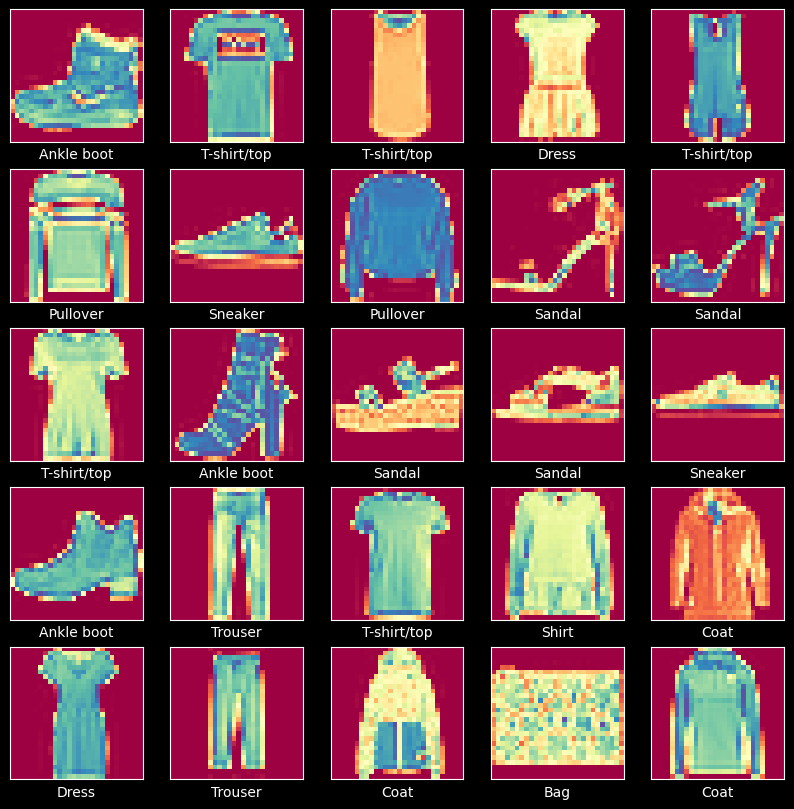

In [16]:
# pruebo imagenes del dataset
# imagen de 5x5 subplots con tamaño de 10x10
plt.figure(figsize=(10,10))
# recorriendo las imagenes
for i in range(25):
    # creando subplots
    plt.subplot(5,5,i+1)
    # xticks y yticks desactivados
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # tomo la imagen de la columna de datos de la imagen
    # el mapa de colores es viridis de matplotlib
    # otras opciones son: "plasma", "viridis", "BuPu", "hsv", "Spectral"
    plt.imshow(fashion_df["img_data"][i], cmap=plt.cm.Spectral)
    # tomo el nombre de la clase de la columna de etiquetas
    plt.xlabel(fashion_df["label"][i])

## Preprocesar los Datos

Los pasos de esta sección son:

1. Revisar que los datos están bien.
2. Elegir la características o propiedades de aprendizaje.
3. Elegir la variable objetivo del aprendizaje.
4. Dividir el conjunto de datos entre las poblaciones de entrenamiento y pruebas.
5. Formatear los datos de aprendizaje y objetivo acorde a la red neuronal.

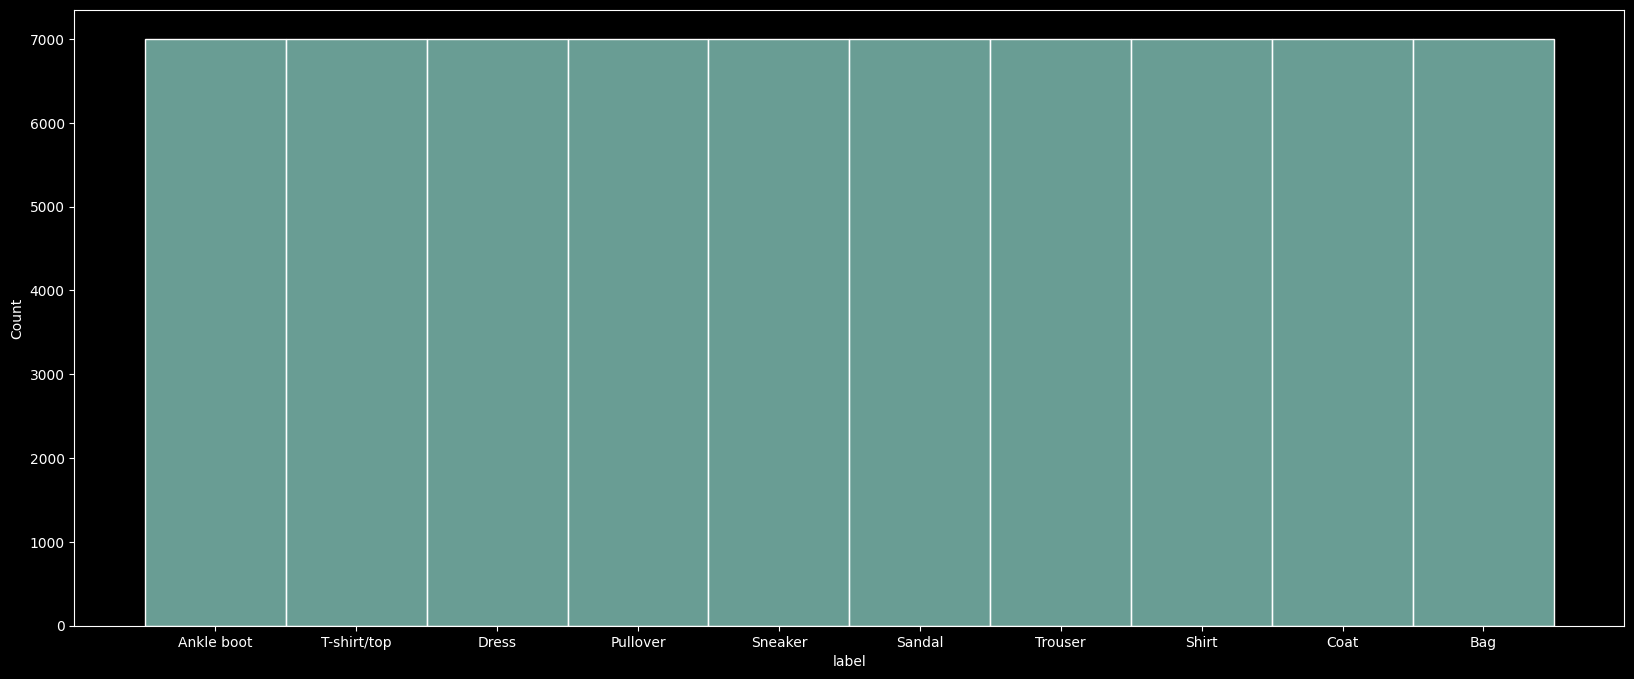

In [17]:
# chequeo la distribucion de datos
# sns.set()
plt.figure(figsize=(20, 8))
sns.histplot(fashion_df[col_names[3]])
plt.show()

In [18]:
# seleccionando caracteristicas de aprendizaje y variables objetivo
# recuperando la forma de las imagenes basado en el primer elemento de la lista

# recuperando los valores y ajustando el tensor para la CNN
A = fashion_df[col_names[4]]
# recuperando los valores de la cateogoria
b = fashion_df[col_names[5]].values

# fortateo de datos numpy
X = np.array([np.array(i, dtype="object") for i in A], dtype="object")
y = np.array([np.array(j, dtype="object") for j in b], dtype="object")

print(X.shape)
# forma basica general de las imagenes
imgsh = X[0].shape
# ajuste de forma para el modelo CNN
X = X.reshape(fashion_df.shape[0], imgsh[0], imgsh[1], 1)
print(X.shape)

(70000, 28, 28)
(70000, 28, 28, 1)


In [19]:
# semilla para el random
rseed = 42

# en tamanho de la muestra para pruebas esta entre 0.2 y 0.3
train_pop = 0.8
test_pop = 1.0 - train_pop

In [20]:
# distribuir los datos entre entrenamiento vs. pruebas
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_pop, random_state=rseed)

In [21]:
# formateo para keras y tensorflow
X_train = tf.convert_to_tensor(X_train, dtype="float64")
y_train = tf.convert_to_tensor(y_train, dtype="float64")
X_test = tf.convert_to_tensor(X_test, dtype="float64")
y_test = tf.convert_to_tensor(y_test, dtype="float64")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56000, 28, 28, 1) (56000, 10) (14000, 28, 28, 1) (14000, 10)


## Definir Modelo CNN

Los pasos de esta sección son:

1. Definir las variables topológicas de la red neuronal.
2. Definir los parámetros de optimización y aprendizaje del modelo.
3. Definir la topología (capas) del modelo.
4. Definir las condiciones de entrenamiento para el modelo.

In [22]:
# defino parametros necesarios para el modelo Autoencoder
# parametros para las capas
filters = 32    # 32, 64, 128
# TODO cambiar el numero de neuronas de la capa intermedia
# mid_neurons, v1 = 7*7, v2 = 28*28
mid_neurons = 28*28
outn = 1

# TODO cambiar la dimension del reshape convolucional
# mid_reshape, v1 = (7, 7, 1), v2 = (28, 28, 1)
mid_reshape = (28, 28, 1)
ksize = (3, 3)

# TODO cambiar el tamano del pool para reducir la imagen
# psize, v1 = (2, 2), v2 = (1, 1)
psize = (1, 1)

# numero de categorias en la salida
categories = len(label_names)

# funcion de activacion para las capas convolucionales
# otras opciones son: # "relu", "LeakyReLU"
act = "LeakyReLU"
# funcion de activacion para la capa de salida
# otras opciones son: # "relu", "sigmoid", "softmax", "LeakyReLU"
out = "LeakyReLU"
# padding para las capas convolucionales
pad = "same"
# porcentaje de dropout para imagenes
ldrop = 0.2

# forma del kernel de entrada y de las capas intermedias
inshape = X[0].shape

# parametros de optimizacion del modelo
# funcion de perdida
# otras opciones son: "mean_squared_error", "mean_absolute_error",
l = "mean_squared_error"
# metodo de optimizacion
opti = "adam"
# metrica de evaluacion
met = ["accuracy"]

# parametros de la bitacora de entrenamiento del modelo, 1 es verbose
ver = 1
# numero de epocas
epo = 30
# tamano del lote de entrenamiento, se recomienda potencia de 2
# otras opciones son: 32, 64, 128, 256
bs = 128         

In [23]:
# definicion de las capas para el Autoencoder
layers = (
    # capa de entrada
    Input(shape = inshape,
          name = "LayIn"),

    # capa convolucional intermedia con regularizacion
    Conv2D(filters,
           ksize,
           activation = act,
           padding = pad,
           name = "EnConv1"),
    MaxPooling2D(psize,
                 padding = pad,
                 name = "EnPool1"),
    # BatchNormalization(name = "EnNorm1"),
    Dropout(ldrop,
            name = "EnDrop1"),

    # capa convolucional intermedia con regularizacion
    Conv2D(int(filters/2),
           ksize,
           activation=act,
           padding = pad,
           name = "EnConv2"),
    MaxPooling2D(psize,
                 padding = pad,
                 name = "EnPool2"),
    # BatchNormalization(name = "EnNorm2"),
    Dropout(ldrop,
            name = "EnDrop2"),
    
    # capa intermedia de 2D a 1D
    Flatten(name = "LayFlat"),
    # # # capa intermedia densamente poblada con regularizacion
    Dense(mid_neurons,
          activation = act,
          name = "DenseMid"),
    # Dropout(ldrop, name = "MidDrop"),
    # # # capa intermedia de 1D a 2D
    Reshape(mid_reshape,
            name = "layReshape"),
    
    # capa convolucional intermedia con regularizacion
    Conv2D(int(filters/2),
           ksize,
           activation = act,
           padding = pad,
           name = "DeConv1"),
    UpSampling2D(psize,
                 name = "DeUpsam1"),
    # BatchNormalization(name = "DeNorm1"),
    Dropout(ldrop,
            name = "DeDrop1"),

    # capa convolucional intermedia con regularizacion
    Conv2D(filters,
           ksize,
           activation = act,
           padding = pad,
           name = "DeConv2"),
    UpSampling2D(psize,
                 name = "DeUpsam2"),
    # BatchNormalization(name = "DeNorm2"),
    Dropout(ldrop,
            name = "DeDrop2"),
    # capa de salida
    # Reshape(inshape),
    Conv2D(outn,
           ksize,
           activation = out,
           padding = pad,
           name = "LayOut"),
    )

In [24]:
# definiendo el modelo CNN en Keras
cnn_model = Sequential(layers)
cnn_model.model_name = "DCNN Autoencoder"

In [25]:
# compilando las condiciones de optimizacion y ajuste del Modelo CNN
cnn_model.compile(loss = l,
                  optimizer = opti,
                  metrics = met)

In [26]:
# resumen de la topologia del modelo
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 EnConv1 (Conv2D)            (None, 28, 28, 32)        320       
                                                                 
 EnPool1 (MaxPooling2D)      (None, 28, 28, 32)        0         
                                                                 
 EnDrop1 (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 EnConv2 (Conv2D)            (None, 28, 28, 16)        4624      
                                                                 
 EnPool2 (MaxPooling2D)      (None, 28, 28, 16)        0         
                                                                 
 EnDrop2 (Dropout)           (None, 28, 28, 16)        0         
                                                                 
 LayFlat (Flatten)           (None, 12544)             0

La imagen del modelo esta en: Models\discws_cnn_autoencoder.png


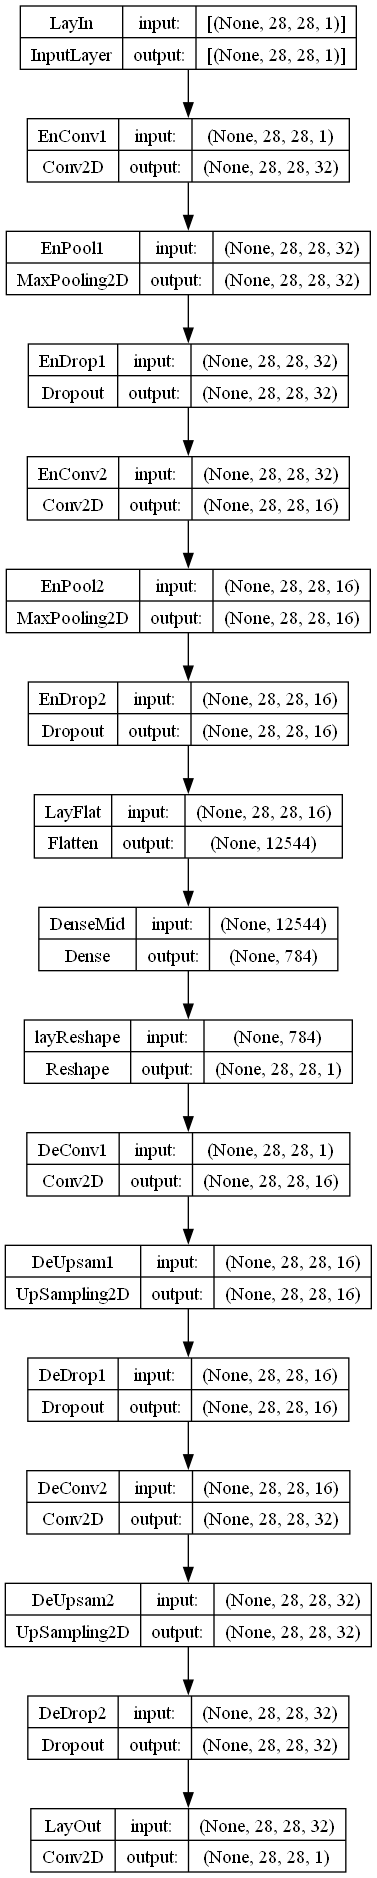

In [27]:
# imprimo imagen de la topologia del modelo
wdir = os.getcwd()
folder_models = "Models"
model_fn = "discws_cnn_autoencoder.png"
model_fp = os.path.join(folder_models, model_fn)
print("La imagen del modelo esta en:", model_fp)
keras.utils.plot_model(cnn_model,
                       model_fp,
                       show_shapes=True)

In [28]:
# condiciones de parada temprana
cnn_earlystop_acc = EarlyStopping(monitor = "val_accuracy",
                                  min_delta = 0.001,
                                  patience = 5,
                                  verbose = ver,
                                  mode = "max",
                                  restore_best_weights = True)

## Entrenar Modelo

Los pasos de esta sección son:

1. Entrenar el modelo con el conjunto de entrenamiento.

In [29]:
# ajustando el modelo MLP Keras
cnn_log = cnn_model.fit(
    x = X_train,    #np.array(X_trainB), 
    y = X_train,    #to_categorical(np.array(y_trainB), categories), 
    batch_size = bs,
    epochs = epo, 
    verbose = ver,
    callbacks = [cnn_earlystop_acc],
    workers = 8,
    shuffle = False,
    use_multiprocessing = True,
    validation_data = (X_test, X_test)
)

Epoch 1/30
438/438 [==============================] - 296s 670ms/step - loss: 0.0160 - accuracy: 0.5076 - val_loss: 0.0037 - val_accuracy: 0.5115
Epoch 2/30
438/438 [==============================] - 340s 776ms/step - loss: 0.0043 - accuracy: 0.5093 - val_loss: 0.0018 - val_accuracy: 0.5116
Epoch 3/30
438/438 [==============================] - 519s 1s/step - loss: 0.0030 - accuracy: 0.5093 - val_loss: 0.0012 - val_accuracy: 0.5116
Epoch 4/30
438/438 [==============================] - 462s 1s/step - loss: 0.0024 - accuracy: 0.5093 - val_loss: 8.3378e-04 - val_accuracy: 0.5116
Epoch 5/30
438/438 [==============================] - 378s 864ms/step - loss: 0.0021 - accuracy: 0.5093 - val_loss: 7.4297e-04 - val_accuracy: 0.5116
Epoch 6/30
438/438 [==============================] - 310s 708ms/step - loss: 0.0019 - accuracy: 0.5093 - val_loss: 5.4837e-04 - val_accuracy: 0.5116
Epoch 6: early stopping


## Probar Modelo

Los pasos de esta sección son:

1. Probar el modelo con el conjunto de pruebas.
2. Evaluar globalmente los resultados.
3. Guardar el modelo entrenado.

In [30]:
cnn_eval = cnn_model.evaluate(x = X_test, y = X_test)

438/438 [==============================] - 23s 52ms/step - loss: 0.0037 - accuracy: 0.5115


In [31]:
# resultados generales
print("Perdida promedio: ", cnn_eval[0])
print("Precision promedio: ", cnn_eval[1])

Perdida promedio:  0.003712573554366827
Precision promedio:  0.5115406513214111


In [32]:
# pruebas sobre el modelo
cnn_predictions = cnn_model.predict(X_test, verbose = ver)

438/438 [==============================] - 22s 50ms/step


In [33]:
# guardar el modelo entrenado
wdir = os.getcwd()
folder_models = "Models"
model_fn = "discws_cnn_autoencoder.h5"
model_fp = os.path.join(folder_models, model_fn)
print("El modelo entrenado esta en:", model_fp)
cnn_model.save(model_fp)
# tf.keras.models.save_model(cnn_autoencoder, model_fp)

El modelo entrenado esta en: Models\discws_cnn_autoencoder.h5


## Mostrar Resultados

Los pasos de esta sección son:

1. Mostrar las curvas de aprendizaje.
2. Mostrar la reconstrucción del Autoencoder.
3. Mostrar la abstracción del Autoencoder.

C:\Users\Felipe\AppData\Local\Temp\ipykernel_39416\1089549431.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


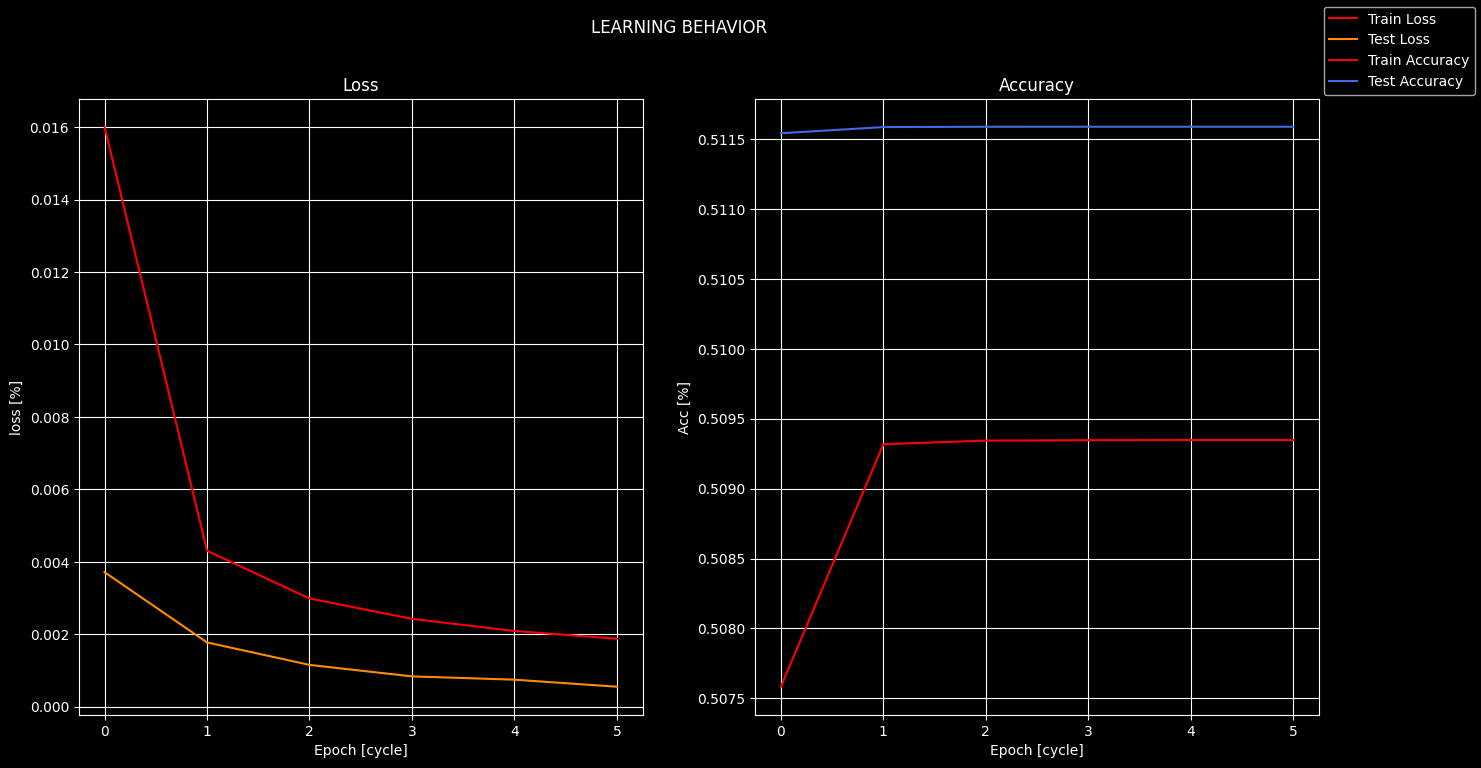

In [34]:
# reporte del aprendizaje
# base de la figura
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,8))

# datos de la figura en de perdida y precision
ax1.plot(cnn_log.history["loss"], 'red', label = "Train Loss")
ax1.plot(cnn_log.history["val_loss"], 'darkorange', label = "Test Loss")
ax2.plot(cnn_log.history["accuracy"], 'red', label = "Train Accuracy")
ax2.plot(cnn_log.history["val_accuracy"], 'royalblue', label = "Test Accuracy")

# leyenda de la grafica
fig.suptitle("LEARNING BEHAVIOR")
ax1.grid(True)
ax2.grid(True)
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.set(xlabel = "Epoch [cycle]", ylabel = "loss [%]")
ax2.set(xlabel = "Epoch [cycle]", ylabel = "Acc [%]")
fig.legend()
fig.show()

In [35]:
# prueba funcional del autoencoder
max_img = 10
random_test_img = np.random.randint(len(X_test), size = max_img)
# random_test_img = range(max_img)
print(len(X_test), len(y_test))
# print(random_test_img)
for img in random_test_img:
    print("Imagen de prueba: ", img)

14000 14000
Imagen de prueba:  8458
Imagen de prueba:  13617
Imagen de prueba:  8598
Imagen de prueba:  9858
Imagen de prueba:  3403
Imagen de prueba:  13400
Imagen de prueba:  9570
Imagen de prueba:  2931
Imagen de prueba:  1446
Imagen de prueba:  13448


In [36]:
middle_layer = "LayFlat"
cnn_abstraction = Model(inputs = cnn_model.input,
                        outputs = cnn_model.get_layer(middle_layer).output)

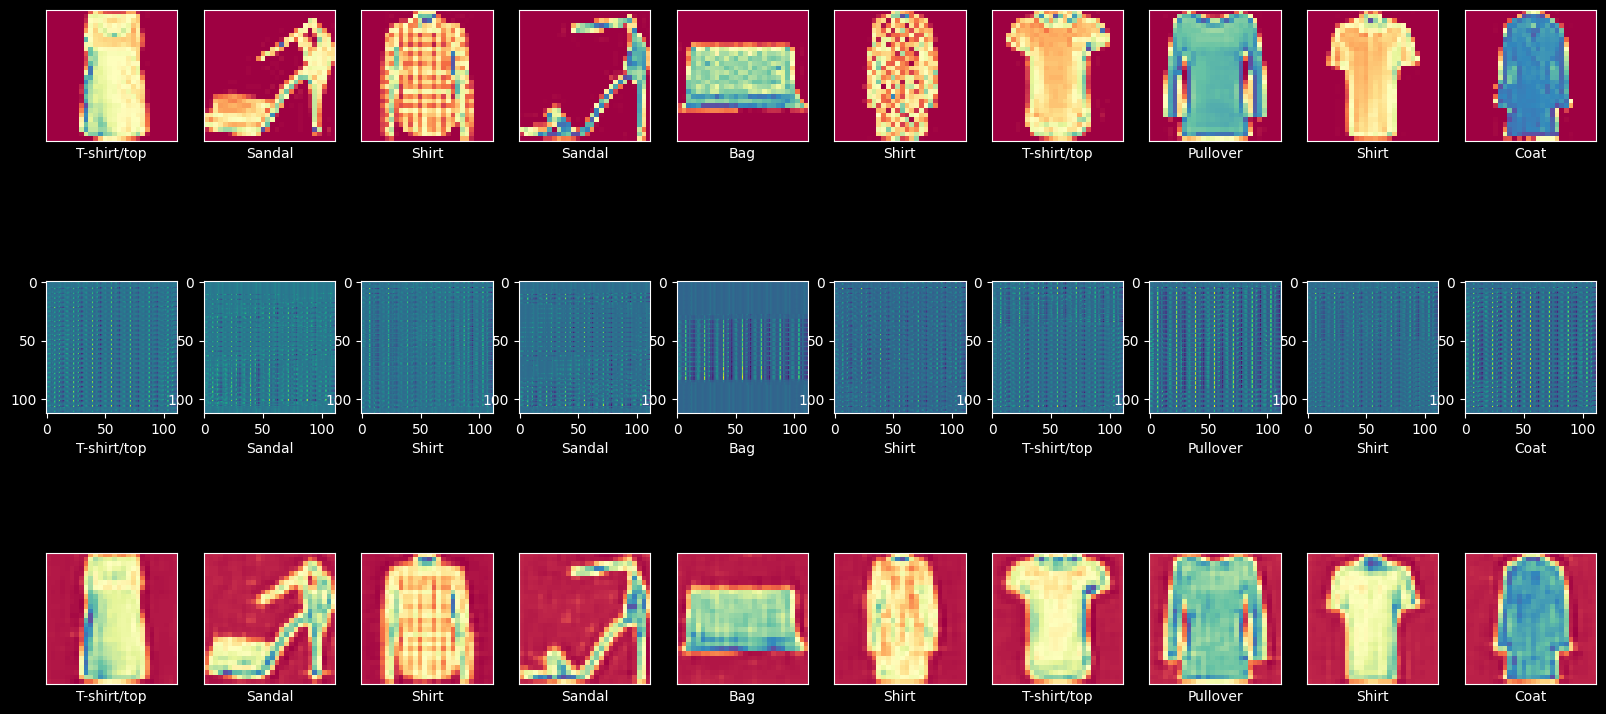

In [37]:
# desplegando pruebas
plt.figure(figsize=(20, 10))
og_shape = fashion_df[col_names[1]][0]
og_label = fashion_df[col_names[3]][0]

for i, img in enumerate(random_test_img):
    # imagen original
    ax = plt.subplot(3, max_img, i + 1)
    temp_X = np.array(X_test[img])
    # ajustar ty tamaño y color al original
    plt.imshow(temp_X.reshape(og_shape),
               cmap=plt.cm.Spectral)
    # imprimir el nombre de la clase
    idx = list(y_test[img]).index(max(y_test[img]))
    # print(idx, label_names[idx])
    # print(label_names)
    plt.xlabel(label_names[idx])
    plt.xticks([])
    plt.yticks([])

    # imagen abstracta de la capa intermedia del autoencoder
    ax = plt.subplot(3, max_img, max_img + i + 1)
    # recuperar la imagen abstracta
    temp_abstract = cnn_abstraction(temp_X)
    # formato de la imagen abstracta
    temp_abstract = np.array(temp_abstract)
    # ajusta tamaño y color
    px = temp_abstract.shape[0]*temp_abstract.shape[1]
    px = int(np.sqrt(px))
    plt.imshow(temp_abstract.reshape(px, px),
               cmap=plt.cm.viridis)
    # imprimir nombre de la clase
    plt.xlabel(label_names[idx])
    # plt.xticks([])
    # plt.yticks([])

    # imagen reconstruida por el autoencoder
    ax = plt.subplot(3, max_img, 2*max_img + i + 1)
    # formatear la imagen reconstruida
    temp_pre = np.array(cnn_predictions[img])
    # ajustar tamaño y color
    plt.imshow(temp_pre.reshape(og_shape),
               cmap=plt.cm.Spectral)
    # imprimir nombre de la clase
    plt.xlabel(label_names[idx])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)